In [ ]:
import pandas as pd
df=pd.read_csv(r"blogs.csv")               # importing dataset
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [ ]:
df.describe()                 # EDA Process 1

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [ ]:
df.isnull().sum()

,0
Data,0
Labels,0


In [ ]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [ ]:
df.nunique()

,0
Data,2000
Labels,20


In [ ]:
df.shape

(2000, 2)

In [ ]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
!pip install pandas scikit-learn nltk             # importing nltk for text processing

In [ ]:
import string                                                                    #imporitng necessary libraries
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
import nltk

In [ ]:
nltk.download('stopwords')                     # text processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data_path = (r"blogs.csv")
df = pd.read_csv(data_path)

In [ ]:
text_column = 'Data'
label_column = 'Labels'

In [ ]:
def preprocess_text(text):
     text = text.translate(str.maketrans('', '', string.punctuation))
     text = text.lower()
     text = re.sub(r'\d+', '', text)
     text = re.sub(r'\s+', ' ', text).strip()
     stop_words = set(stopwords.words('english'))
     text = ' '.join([word for word in text.split() if word not in stop_words])
     return text


In [ ]:
df[text_column] = df[text_column].apply(preprocess_text)

In [ ]:
vectorizer = TfidfVectorizer()                                  # vectorizing for smooth text processing
X = vectorizer.fit_transform(df[text_column])

In [ ]:
y = df[label_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)             # train test split


In [ ]:
model = MultinomialNB()              # model fitting for naives_bayes
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.84
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.74      0.88      0.80        16
                 sci.med       0.88 

In [ ]:
# accuracy of 84% is an excellent model for development and can be continued with naives_bayes

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def analyze_sentiment(text):                                    # sentiment analysis
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Sentiment'] = df[text_column].apply(analyze_sentiment)

In [ ]:
sentiment_distribution = df.groupby(['Sentiment', label_column]).size().unstack(fill_value=0)
print("\nSentiment Distribution by Category:\n", sentiment_distribution)


Sentiment Distribution by Category:
 Labels     alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
Sentiment                                                        
Negative            35             27                       23   
Neutral              0              0                        0   
Positive            65             73                       77   

Labels     comp.sys.ibm.pc.hardware  comp.sys.mac.hardware  comp.windows.x  \
Sentiment                                                                    
Negative                         19                     26              20   
Neutral                           0                      0               2   
Positive                         81                     74              78   

Labels     misc.forsale  rec.autos  rec.motorcycles  rec.sport.baseball  \
Sentiment                                                                 
Negative             21         24               28                  35   
Neutral        

In [ ]:
print("\nSentiment Analysis Reflection:")
print("The sentiment analysis shows the distribution of positive, negative, and neutral sentiments across blog categories. This provides insights into the tone and mood of the blog posts. For instance, a higher proportion of negative sentiments in certain categories might highlight critical or controversial topics.")


Sentiment Analysis Reflection:
The sentiment analysis shows the distribution of positive, negative, and neutral sentiments across blog categories. This provides insights into the tone and mood of the blog posts. For instance, a higher proportion of negative sentiments in certain categories might highlight critical or controversial topics.


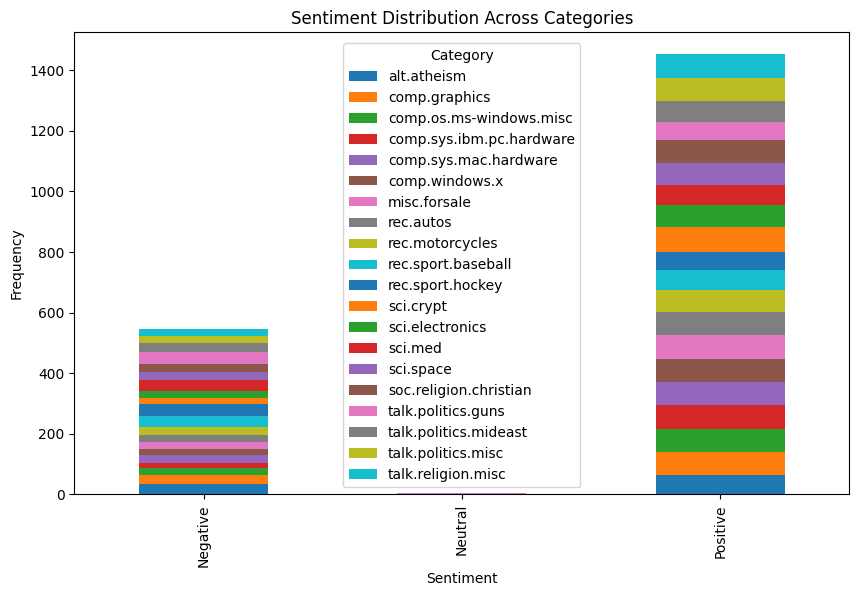

In [ ]:
import matplotlib.pyplot as plt
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))                    # visualization of sentiment analysis
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.legend(title='Category')
plt.show()
